In [9]:
import numpy as np
import scipy as sp
import statsmodels.formula.api as smf
import pylab as pl
import matplotlib.pyplot as plt
import pandas as pd
%pylab inline
%matplotlib inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
df = pd.read_csv('Asc.csv', header=None, names=['x', 'y1','tmp2', 'y2', 'tmp3', 'tmp4', 'tmp5', 'tmp6'], sep="\t")

In [3]:
df

,x,y1,tmp2,y2,tmp3,tmp4,tmp5,tmp6
0,10.0,8.04,10.0,9.14,10.0,7.46,8.0,6.58
1,8.0,6.95,8.0,8.14,8.0,6.77,8.0,5.76
2,13.0,7.58,13.0,8.74,13.0,12.74,8.0,7.71
3,9.0,8.81,9.0,8.77,9.0,7.11,8.0,8.84
4,11.0,8.33,11.0,9.26,11.0,7.81,8.0,8.47
5,14.0,9.96,14.0,8.10,14.0,8.84,8.0,7.04
6,6.0,7.24,6.0,6.13,6.0,6.08,8.0,5.25
7,4.0,4.26,4.0,3.10,4.0,5.39,19.0,12.50
8,12.0,10.84,12.0,9.13,12.0,8.15,8.0,5.56
9,7.0,4.82,7.0,7.26,7.0,6.42,8.0,7.91


In [4]:
df.sort_values(by='x', inplace=True)

In [5]:
df

,x,y1,tmp2,y2,tmp3,tmp4,tmp5,tmp6
7,4.0,4.26,4.0,3.10,4.0,5.39,19.0,12.50
10,5.0,5.68,5.0,4.74,5.0,5.73,8.0,6.89
6,6.0,7.24,6.0,6.13,6.0,6.08,8.0,5.25
9,7.0,4.82,7.0,7.26,7.0,6.42,8.0,7.91
1,8.0,6.95,8.0,8.14,8.0,6.77,8.0,5.76
3,9.0,8.81,9.0,8.77,9.0,7.11,8.0,8.84
0,10.0,8.04,10.0,9.14,10.0,7.46,8.0,6.58
4,11.0,8.33,11.0,9.26,11.0,7.81,8.0,8.47
8,12.0,10.84,12.0,9.13,12.0,8.15,8.0,5.56
2,13.0,7.58,13.0,8.74,13.0,12.74,8.0,7.71


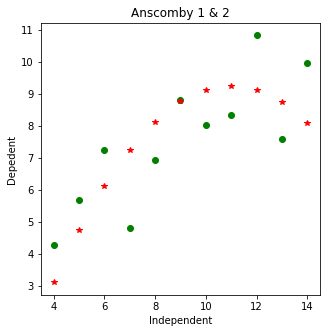

In [7]:
pl.figure(figsize=(5,5))
pl.plot(df['x'], df['y1'], 'go')
pl.plot(df['x'], df['y2'], 'r*')
pl.xlabel('Independent')
pl.ylabel('Depedent')
pl.title('Anscomby 1 & 2');

Figure 1. This plot shows the distribution of x, y1, y2, the x axis is x, the y axis is y1 and y2.

# First Anscomby distribution: y1

## OLS linear fit  y1~x

In [8]:
OLS1 = smf.ols(formula='y1  ~ x', data=df).fit()
print(OLS1.summary())

                            OLS Regression Results                            
Dep. Variable:                     y1   R-squared:                       0.667
Model:                            OLS   Adj. R-squared:                  0.629
Method:                 Least Squares   F-statistic:                     17.99
Date:                Thu, 29 Nov 2018   Prob (F-statistic):            0.00217
Time:                        14:35:06   Log-Likelihood:                -16.841
No. Observations:                  11   AIC:                             37.68
Df Residuals:                       9   BIC:                             38.48
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      3.0001      1.125      2.667      0.0

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  "anyway, n=%i" % int(n))


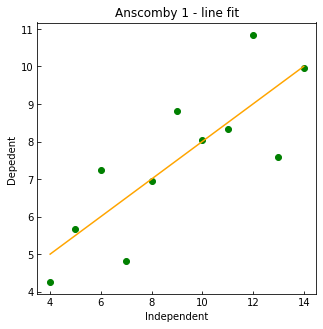

In [18]:
pl.figure(figsize=(5,5))
pl.plot(df['x'],df['y1'],'go')
pl.plot(df['x'], OLS1.predict(df),'-', color='orange')
pl.xlabel('Independent')
pl.ylabel('Depedent')
pl.title('Anscomby 1 - line fit');

Figure 2. This plot shows the distribution of x and y1, the line is the linear regression fit line.

## OLS quadratic fit  y1~x^2 + x

In [10]:
# create a new feature for x^2
df['x2'] = df['x']**2

In [11]:
OLS2 = smf.ols(formula='y1 ~ x2 + x',data=df).fit()
print(OLS2.summary())

                            OLS Regression Results                            
Dep. Variable:                     y1   R-squared:                       0.687
Model:                            OLS   Adj. R-squared:                  0.609
Method:                 Least Squares   F-statistic:                     8.793
Date:                Thu, 29 Nov 2018   Prob (F-statistic):            0.00956
Time:                        14:53:02   Log-Likelihood:                -16.487
No. Observations:                  11   AIC:                             38.97
Df Residuals:                       8   BIC:                             40.17
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      0.7551      3.288      0.230      0.8

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  "anyway, n=%i" % int(n))


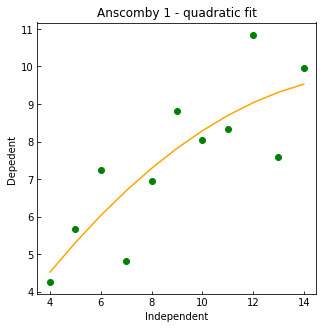

In [23]:
pl.figure(figsize=(5,5))
pl.plot(df['x'],df['y1'],'go')
pl.plot(df['x'], OLS2.predict(df),'-', color='orange')
pl.xlabel('Independent')
pl.ylabel('Depedent')
pl.title('Anscomby 1 - quadratic fit');

Figure 3. This plot shows the distribution of $x$, $x^2$ and $y1$, the line is the linear regression fit line.

# Compare the models with the LR ratio test

In [29]:
OLS2.compare_lr_test(OLS1)

(0.70794919019374447, 0.40012547285804223, 1.0)

# Do it yourself as homework:
    1 write down in words what this result means
    2 do the same for the other series of data (y2)
    3 use the value of the likelihood which you can find in the models summary and the formula for the likelihood ration in the slides to derive the same result: you should be able to obtain the value of the statistics and by comparing it with a chisq table the relative p-value


# chi sq table for your convenience

![chi sq table](chisq.gif)

Equation of LR:
    
    LR = -2 log (Likelihood_restricted / likelihood_complex)
    
or equivalently

    LR = -2 (log(Likelihood)_restricted - log(Likelihood)_complex)

where log is the natural log (base e)

In [34]:
LR = OLS2.compare_lr_test(OLS1)[0]
p_value = OLS2.compare_lr_test(OLS1)[1]
dof = OLS2.compare_lr_test(OLS1)[2]
print('LR:', LR, 'p_value:', p_value, 'dof:', dof)

LR: 0.707949190194 p_value: 0.400125472858 dof: 1.0


### Null hypothesis: The simple model is true, sig = 0.05. LR = 0.707, the dof = 1 in this case, and in chi-square distribution, when the sig = 0.05, chi-suqare = 0.004. Therefore, we cannot reject the null hypothesis.

                            OLS Regression Results                            
Dep. Variable:                     y2   R-squared:                       0.666
Model:                            OLS   Adj. R-squared:                  0.629
Method:                 Least Squares   F-statistic:                     17.97
Date:                Thu, 29 Nov 2018   Prob (F-statistic):            0.00218
Time:                        15:16:05   Log-Likelihood:                -16.846
No. Observations:                  11   AIC:                             37.69
Df Residuals:                       9   BIC:                             38.49
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      3.0009      1.125      2.667      0.0

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  "anyway, n=%i" % int(n))


Text(0.5,1,'x, y2, line fit')

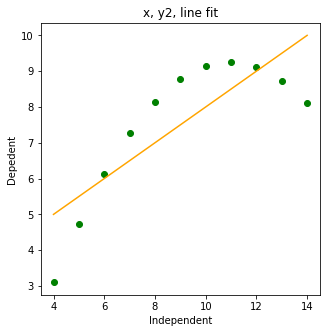

In [36]:
OLSy2_1 = smf.ols(formula='y2  ~ x', data=df).fit()
print(OLSy2_1.summary())
plt.figure(figsize=(5,5))
plt.plot(df['x'],df['y2'],'go')
plt.plot(df['x'], OLSy2_1.predict(),'-', color='orange')
plt.xlabel('Independent')
plt.ylabel('Depedent')
plt.title('x, y2, line fit')

Figure 3. This plot shows the distribution of $x$ and $y2$, the line is the linear regression fit line.

                            OLS Regression Results                            
Dep. Variable:                     y2   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 7.378e+06
Date:                Thu, 29 Nov 2018   Prob (F-statistic):           8.64e-26
Time:                        15:16:12   Log-Likelihood:                 56.471
No. Observations:                  11   AIC:                            -106.9
Df Residuals:                       8   BIC:                            -105.7
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     -5.9957      0.004  -1384.713      0.0

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  "anyway, n=%i" % int(n))


Text(0.5,1,'x, $x^2$, y2, line fit')

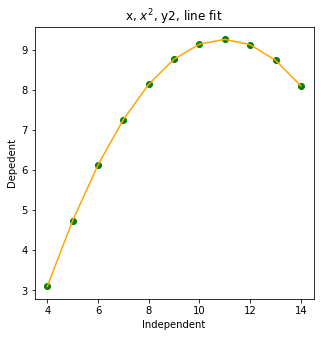

In [37]:
OLSy2_2 = smf.ols(formula='y2 ~ x2 + x',data=df).fit()
print(OLSy2_2.summary())
plt.figure(figsize=(5,5))
plt.plot(df['x'],df['y2'],'go')
plt.plot(df['x'], OLSy2_2.predict(),'-', color='orange')
plt.xlabel('Independent')
plt.ylabel('Depedent')
plt.title('x, $x^2$, y2, line fit')

Figure 4. This plot shows the distribution of $x$, $x^2$ and $y2$, the line is the linear regression fit line. We can tell that the result of predict totally fit the actual data point.

In [39]:
LR = OLSy2_2.compare_lr_test(OLSy2_1)[0]
p_value = OLSy2_2.compare_lr_test(OLSy2_1)[1]
dof = OLSy2_2.compare_lr_test(OLSy2_1)[2]
print('LR:', LR, 'p_value:', p_value, 'dof:', dof)

LR: 146.634379804 p_value: 9.43318342084e-34 dof: 1.0


### Null hypothesis: The simple model is true, sig = 0.05. 
### In this case, LR = 146.63, the dof = 1  and p_value < 0.05 . Therefore, we can reject the null hypothesis, and conclude that the second (alternative) model is true.
